In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.signal import argrelextrema
import time

from math import *

In [19]:
W=2*np.pi
T=(2*np.pi)/W
n=50
L=n*T

N_grid=10000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]
p=int(round(T/h))

d=0.25
dd=-0.2

dw_samples=np.linspace(0.05, 0.125, 50)


In [20]:
dual_border=[]
for dw in dw_samples:
    left=1
    if dw==0.05:
        right=N_grid-2*p-1
    else:
        right=dual_border[-1]
  
    start = time.time()
    while (right-left>1):
        s=round((left+right)/2)

        k0=np.array([d]*N_grid)
        k0[2*p:2*p+s]=d+dd
        k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

        f=lambda t, x: 2*dw-k0_f(t)*sin(x)

        init=np.arcsin(2*dw/k0[0])

        theta=[0]*N_grid
        for i in range(N_grid):
            if i==0:
                theta[i]=init
            else:
                k1=f(t[i-1], theta[i-1])*h
                k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
                k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
                k4=f(t[i-1]+h, theta[i-1]+k3)*h

                theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

        theta=np.array(theta)
        x0=np.sin(W*t)
        y0=np.sin(W*t+theta)

        C_0=[0]*N_grid
        for i in range(N_grid):
            if (t[i]-T/2>=0) and (t[i]+T/2<=L):
                C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
            else:
                C_0[i]=nan

        phi0=np.arccos(C_0)
        k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

        
        dk=np.diff(k_hat)/h
        dk=np.nan_to_num(dk)
        #print(left, right)
        if (max(dk)>15):
            right=s
        else:
            left=s

    stop = time.time()        
    print('-----: ', stop-start, left, dw)
    dual_border.append(left)
    
np.savetxt('PT1409_50_10000_extr_break_fast_long_025.out', dual_border, delimiter=',')

-----:  92.16713547706604 8107 0.05
-----:  71.05036544799805 7471 0.0515306122449
-----:  68.88766312599182 7309 0.0530612244898
-----:  64.05724000930786 6629 0.0545918367347
-----:  64.6985330581665 6307 0.0561224489796
-----:  58.979634046554565 6119 0.0576530612245
-----:  63.73328447341919 5740 0.0591836734694
-----:  64.40086841583252 5471 0.0607142857143
-----:  59.13835954666138 5111 0.0622448979592
-----:  59.92231345176697 4952 0.0637755102041
-----:  64.61428332328796 4682 0.065306122449
-----:  59.008851528167725 4422 0.0668367346939
-----:  67.69236731529236 4301 0.0683673469388
-----:  75.43208193778992 4169 0.0698979591837
-----:  77.03609609603882 3878 0.0714285714286
-----:  73.19349765777588 3692 0.0729591836735
-----:  73.75097727775574 3534 0.0744897959184
-----:  72.19179821014404 3384 0.0760204081633
-----:  58.00037956237793 3241 0.0775510204082
-----:  56.772605657577515 3115 0.0790816326531
-----:  56.49233293533325 3091 0.080612244898
-----:  55.9152345657348

In [6]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    from math import factorial
    
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [7]:
dw_samples=np.linspace(0.05, 1.25, 50)
dual_border=np.fromfile(file='PT1409_50_10000_extr_break_fast_long.out', sep='\n')
#dual_border_sm=savitzky_golay(dual_border, 70, 1)

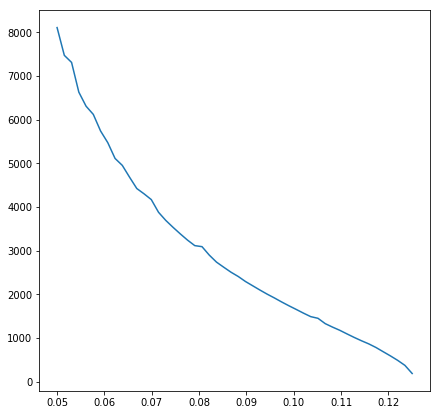

In [21]:
plt.figure(figsize=(7,7))
#dual_border=np.array([9598, 3088, 1800, 1244, 933, 734, 595, 493, 415, 364, 300, 257, 220, 188, 159, 132, 107, 82, 57, 1])
plt.plot(dw_samples, dual_border)
#plt.plot(dw_samples, dual_border_sm, 'r')
plt.show()